In [ ]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Genre'] = le.fit_transform(df['Genre'])

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
groups = []
df['Groups'] = ''
for j in df['Spending Score (1-100)']: 
    if j<=20:
        group = 'A'
        groups.append(group)
    elif j>20 and j<=40:
        group = 'B'
        groups.append(group)
    elif j>40 and j<=60:
        group = 'C'
        groups.append(group)
    elif j>60 and j<=80:
        group = 'D'
        groups.append(group)
    else:
        group = 'E'
        groups.append(group)

for i in range(len(df['Groups'])):
    df['Groups'][i] = groups[i]

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Groups
0,1,1,19,15,39,B
1,2,1,21,15,81,E
2,3,0,20,16,6,A
3,4,0,23,16,77,D
4,5,0,31,17,40,B


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Groups                    0
dtype: int64

In [ ]:
le = LabelEncoder()

df['Groups'] = le.fit_transform(df['Groups'])

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Groups
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,3
4,5,0,31,17,40,1


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Groups                    0
dtype: int64

In [ ]:
X = df.drop('Groups', axis=1)
y = df['Groups']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ytrain

79     2
197    3
38     1
24     0
122    2
      ..
106    2
14     0
92     2
179    4
102    2
Name: Groups, Length: 160, dtype: int64

In [ ]:
Xtrain.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Logistic Regression 

logistic = LogisticRegression() 

logistic.fit(Xtrain, ytrain)

predictions = logistic.predict(Xtest)

accuracy_score(ytest, predictions) 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.725

In [ ]:
# KNN 

KNN = KNeighborsClassifier()

KNN.fit(Xtrain, ytrain)

predictionsKNN = KNN.predict(Xtest)

accuracy_score(ytest, predictionsKNN)

0.9

In [ ]:
# Decision Tree Classifier 

decision = DecisionTreeClassifier() 

decision.fit(Xtrain, ytrain)

predictionsDecisionTree = decision.predict(Xtest)

accuracy_score(ytest, predictionsDecisionTree)

1.0

In [ ]:
# SVM 

svmmodel1 = svm.SVC()
svmmodel2 = svm.LinearSVC() 

svmmodel1.fit(Xtrain, ytrain)
svmmodel2.fit(Xtrain, ytrain)

predictionsSVC = svmmodel1.predict(Xtest)
predictionsLinearSVC = svmmodel2.predict(Xtest)

print("The accuracy with SVC is {}".format(accuracy_score(ytest, predictionsSVC)))
print("The accuracy with LinearSVC is {}".format(accuracy_score(ytest, predictionsLinearSVC)))

The accuracy with SVC is 0.7
The accuracy with LinearSVC is 0.65


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix

print("Confusion Matrix for Logistic Regression")
print(confusion_matrix(ytest, predictions))

print("Confusion Matrix for KNN")
print(confusion_matrix(ytest, predictionsKNN))

print("Confusion Matrix for Decision Tree Classifier")
print(confusion_matrix(ytest, predictionsDecisionTree))

print("Confusion Matrix for SVM")
print(confusion_matrix(ytest, predictionsSVC))

Confusion Matrix for Logistic Regression
[[ 8  0  0  0  0]
 [ 2  3  3  0  0]
 [ 0  0 12  1  3]
 [ 0  0  0  5  2]
 [ 0  0  0  0  1]]
Confusion Matrix for KNN
[[ 8  0  0  0  0]
 [ 3  4  1  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  1]]
Confusion Matrix for Decision Tree Classifier
[[ 8  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  1]]
Confusion Matrix for SVM
[[ 8  0  0  0  0]
 [ 4  1  3  0  0]
 [ 0  0 16  0  0]
 [ 0  0  1  2  4]
 [ 0  0  0  0  1]]


In [ ]:
# Classification Report 

from sklearn.metrics import f1_score 

print("The F1 Score for Logistic Regression")
print(f1_score(ytest, predictions, average='macro'))
print(f1_score(ytest, predictions, average='micro'))
print('\n')

print("The F1 Score for KNN")
print(f1_score(ytest, predictionsKNN, average='macro'))
print(f1_score(ytest, predictionsKNN, average='micro'))
print('\n')

print("The F1 Score for Decision Tree Classifier")
print(f1_score(ytest, predictionsDecisionTree, average='macro'))
print(f1_score(ytest, predictionsDecisionTree, average='micro'))
print('\n')

print("The F1 Score for SVM")
print(f1_score(ytest, predictionsSVC, average='macro'))
print(f1_score(ytest, predictionsSVC, average='micro'))
print('\n')

The F1 Score for Logistic Regression
0.6526964075351172
0.7250000000000001


The F1 Score for KNN
0.8956937799043063
0.9


The F1 Score for Decision Tree Classifier
1.0
1.0


The F1 Score for SVM
0.5377777777777778
0.7




In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
accuracies = [] 
accuracies.append(accuracy_score(ytest, predictions))
accuracies.append(accuracy_score(ytest, predictionsKNN))
accuracies.append(accuracy_score(ytest, predictionsDecisionTree))
accuracies.append(accuracy_score(ytest, predictionsSVC))
accuracies

[0.725, 0.9, 1.0, 0.7]

In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'SVM']
models

['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'SVM']

<BarContainer object of 4 artists>

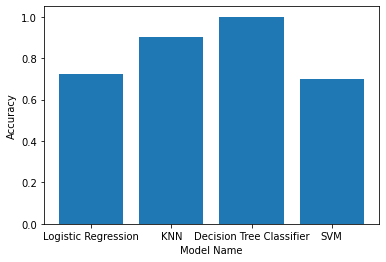

In [ ]:
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.bar(models, accuracies)

In [ ]:
f1ScoreMacro = []
f1ScoreMacro.append(f1_score(ytest, predictions, average='macro'))
f1ScoreMacro.append(f1_score(ytest, predictionsKNN, average='macro'))
f1ScoreMacro.append(f1_score(ytest, predictionsDecisionTree, average='macro'))
f1ScoreMacro.append(f1_score(ytest, predictionsSVC, average='macro'))
f1ScoreMacro

[0.6526964075351172, 0.8956937799043063, 1.0, 0.5377777777777778]

In [ ]:
f1ScoreMicro = []
f1ScoreMicro.append(f1_score(ytest, predictions, average='micro'))
f1ScoreMicro.append(f1_score(ytest, predictionsKNN, average='micro'))
f1ScoreMicro.append(f1_score(ytest, predictionsDecisionTree, average='micro'))
f1ScoreMicro.append(f1_score(ytest, predictionsSVC, average='micro'))
f1ScoreMicro

[0.7250000000000001, 0.9, 1.0, 0.7]

<BarContainer object of 4 artists>

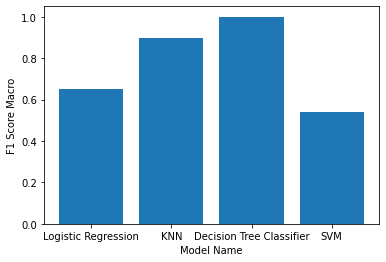

In [ ]:
plt.xlabel('Model Name')
plt.ylabel('F1 Score Macro')
plt.bar(models, f1ScoreMacro)

<BarContainer object of 4 artists>

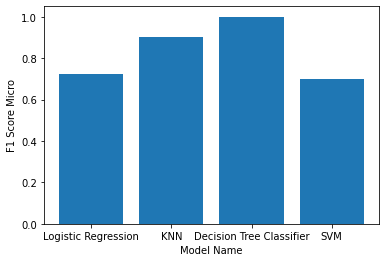

In [ ]:
plt.xlabel('Model Name')
plt.ylabel('F1 Score Micro')
plt.bar(models, f1ScoreMicro)

In [ ]:
# The Accuracy and F1 Score of Decision Tree Classifier is the maximum being 1.0